# MIRA: Final Project 2023
Professor: Josep Quintana, Robert Martí

Topic: Image registration of chest CT volumes: 4DCT DIR-Lab Challenge

Taiabur


In [5]:
import os
import pandas as pd
from pathlib import Path


In [6]:
# Path Setup
MAIN_PATH       = Path('./').resolve()
TRAIN_DATA_PATH = MAIN_PATH / 'dataset' / 'train'
OUTPUT_DATA_PATH = MAIN_PATH / 'dataset' / 'output'

In [7]:

# Create an empty list to store data for DataFrame
data = []

for i, dir in enumerate(TRAIN_DATA_PATH.iterdir()):
    # Skip .DS_Store
    if dir.name == '.DS_Store':
        continue

    id = dir.stem
    
    inhale_image_name = f'{id}_iBHCT.img'
    exhale_image_name = f'{id}_eBHCT.img'

    inhale_landmark_name = f'{id}_300_iBH_xyz_r1.txt'
    exhale_landmark_name = f'{id}_300_eBH_xyz_r1.txt'
    
    # Append data to the list including new columns
    data.append({
        "COPD_Type": id,
        "folder_path": dir,
        "inhale_image": inhale_image_name ,
        "exhale_image": exhale_image_name,
        "inhale_landmark": inhale_landmark_name,
        "exhale_landmark": exhale_landmark_name,
                # "TxtFileExists": txt_file_exists
    })


# Create DataFrame
df = pd.DataFrame(data)

# Map COPD types to dimensions
copd_dimensions = {
    'copd1': (512, 512, 121),
    'copd2': (512, 512, 102),
    'copd3': (512, 512, 126),
    'copd4': (512, 512, 126)
}

# Map COPD types to voxels (mm)
copd_voxels = {
    'copd1': (0.625, 0.625, 2.5),
    'copd2': (0.645, 0.645, 2.5),
    'copd3': (0.652, 0.652, 2.5),
    'copd4': (0.590, 0.590, 2.5)
}

# Map COPD types to Displacement mean (mm)
copd_displacement_mean = {
    'copd1': (25.90),
    'copd2': (21.77),
    'copd3': (12.29),
    'copd4': (30.90)
}

# Map COPD types to Displacement Standard deviation (mm)
copd_displacement_std = {
    'copd1': (11.57),
    'copd2': (6.46),
    'copd3': (6.39),
    'copd4': (13.49)
}

# Add a new column 'Dimensions' based on 'COPD Type'
df['Dimensions'] = df['COPD_Type'].map(copd_dimensions)

# Add a new column 'Voxels' based on 'COPD Type'
df['Voxels'] = df['COPD_Type'].map(copd_voxels)

# Add a new column 'DisplacementMean' based on 'COPD Type'
df['DisplacementMean'] = df['COPD_Type'].map(copd_displacement_mean)

# Add a new column 'DisplacementStd' based on 'COPD Type'
df['DisplacementStd'] = df['COPD_Type'].map(copd_displacement_std)

# Add a new column 'DisplacementStd' based on 'COPD Type'
df['cvt_inhale_image'] = ["","","",""]
df['cvt_exhale_image'] = ["","","",""]

df = df.sort_values(by='COPD_Type')

# Save DataFrame to CSV file
csv_file_path =  "dataset/csv/4DCT_df.csv"
df.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to {csv_file_path}")

DataFrame saved to dataset/csv/4DCT_df.csv


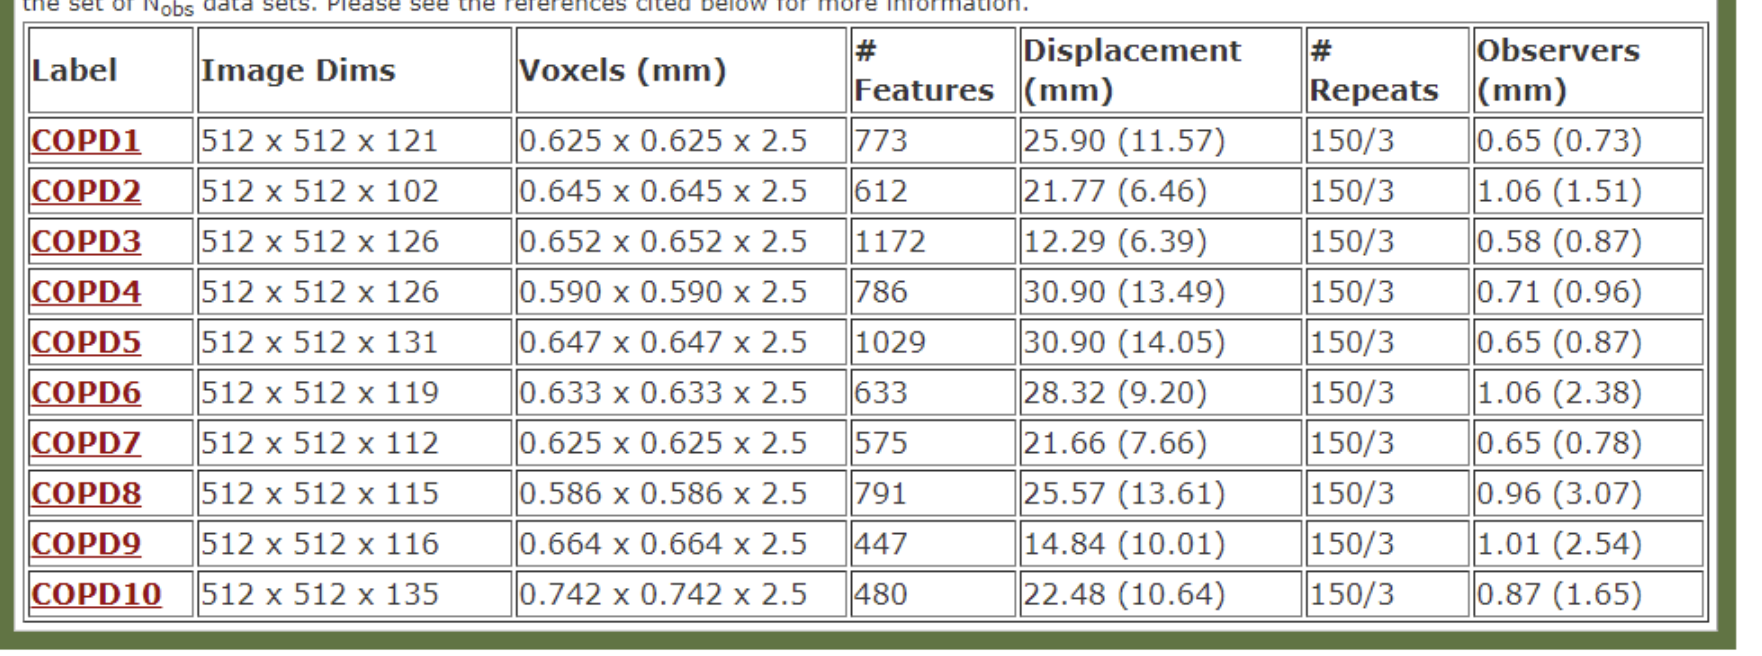

In [8]:
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)

  COPD_Type                                        folder_path  \
0     copd1  /Users/taiaburrahman/Desktop/git/chest_ct_regi...   
1     copd2  /Users/taiaburrahman/Desktop/git/chest_ct_regi...   
2     copd3  /Users/taiaburrahman/Desktop/git/chest_ct_regi...   
3     copd4  /Users/taiaburrahman/Desktop/git/chest_ct_regi...   

      inhale_image     exhale_image           inhale_landmark  \
0  copd1_iBHCT.img  copd1_eBHCT.img  copd1_300_iBH_xyz_r1.txt   
1  copd2_iBHCT.img  copd2_eBHCT.img  copd2_300_iBH_xyz_r1.txt   
2  copd3_iBHCT.img  copd3_eBHCT.img  copd3_300_iBH_xyz_r1.txt   
3  copd4_iBHCT.img  copd4_eBHCT.img  copd4_300_iBH_xyz_r1.txt   

            exhale_landmark       Dimensions               Voxels  \
0  copd1_300_eBH_xyz_r1.txt  (512, 512, 121)  (0.625, 0.625, 2.5)   
1  copd2_300_eBH_xyz_r1.txt  (512, 512, 102)  (0.645, 0.645, 2.5)   
2  copd3_300_eBH_xyz_r1.txt  (512, 512, 126)  (0.652, 0.652, 2.5)   
3  copd4_300_eBH_xyz_r1.txt  (512, 512, 126)    (0.59, 0.59, 2.5)  